In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder

In [49]:
df = pd.read_csv('data/housing.csv')

In [50]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

ocean_proximity's object, so I'm changing it to int.

In [51]:
df['ocean_proximity'] = LabelEncoder().fit_transform(df['ocean_proximity'])

In [52]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


There are some missing values in total_bedrooms. We'll see if cleaning is required.

In [53]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [54]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


latitude, total_rooms, total_bedrooms, population, household, median_income and ocean_proximity has much smaller 50% than mean, so probably there will be some outliers. Also, it's easy to notice based on 75% and max_value. Only in ocean_proximity dealing with outliers will be hard due to categorical type.

For easier interpret I'm going to change place of "median_house_value" to last.

In [55]:
columns = df.columns.values
columns[-1], columns[-2] = columns[-2], columns[-1]
df = df.reindex(columns=columns)
df['ocean_proximity'], df['median_house_value'] = df['median_house_value'], df['ocean_proximity']

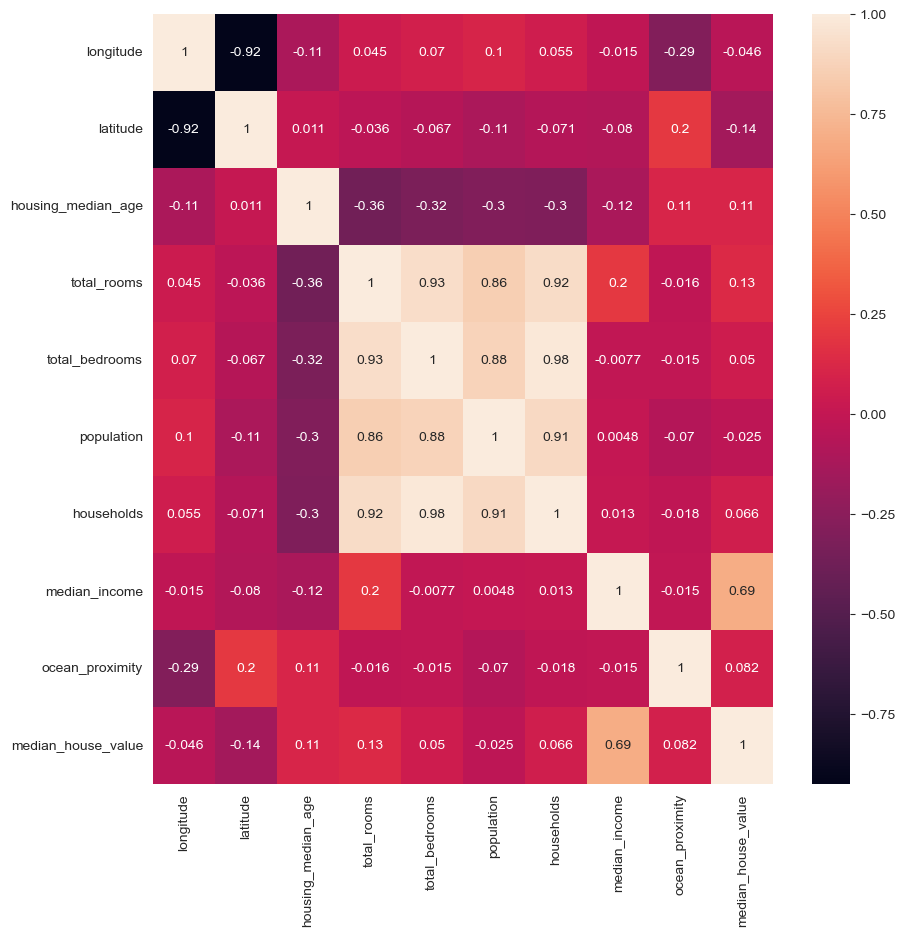

In [11]:
corr_matrix = df.corr()
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Only median_income has good correlation with median_house_value. longitude and latitude have huge correlation - and only between each other. In the center many high correlations between total_rooms, total_bedrooms, population and households are.


## To delete
longitude vs latitude - longitude has better relation with target. longitude stays.

total_rooms vs total_bedrooms vs populations vs household - population has the highest correlation with target and doesn't have NaNs. populations stays.

In [ ]:
sns.set()
sns.pairplot(df)
plt.savefig('pairplot.png')
plt.show()

Based on distributions we can see some outliers. It can be noticed that the target data has significant large number of expensive houses.

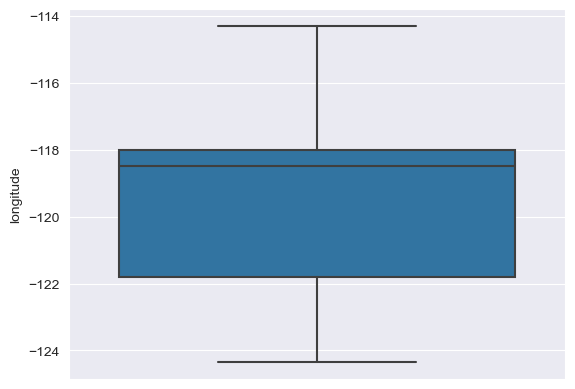

In [12]:
sns.boxplot(y=df['longitude'])
plt.show()

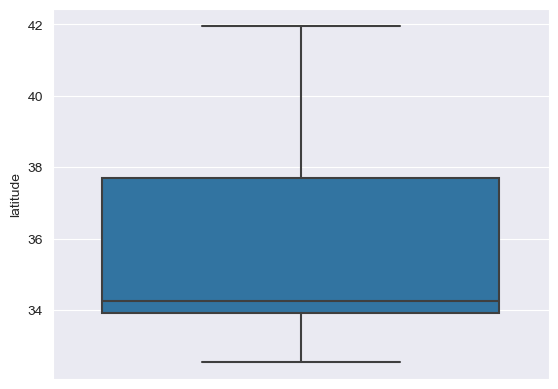

In [13]:
sns.boxplot(y=df['latitude'])
plt.show()

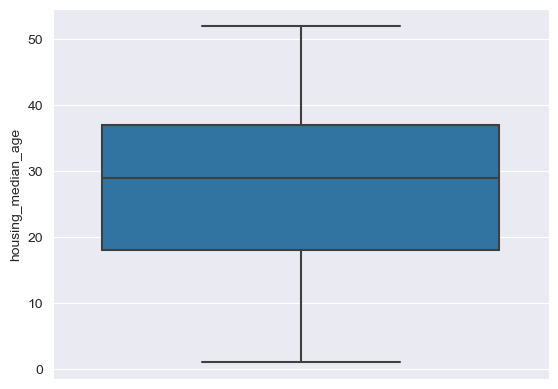

In [14]:
sns.boxplot(y=df['housing_median_age'])
plt.show()

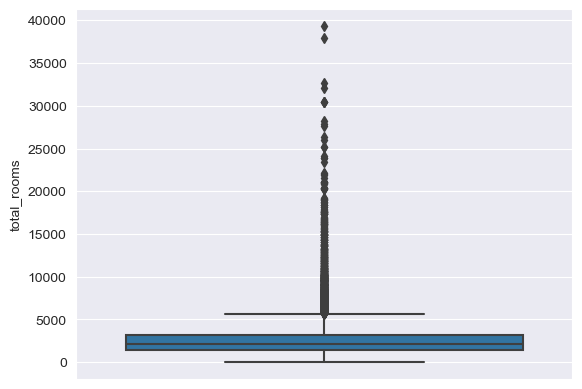

In [15]:
sns.boxplot(y=df['total_rooms'])
plt.show()

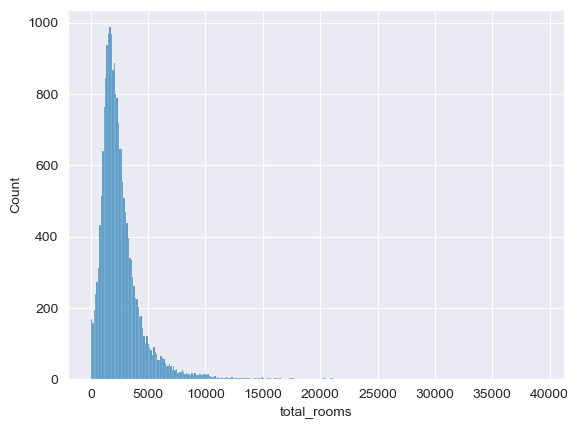

In [16]:
sns.histplot(x=df['total_rooms'])
plt.show()

In [17]:
df[(df['total_rooms'] > 7500)].shape[0]

620

It's not that much compare to all cases.

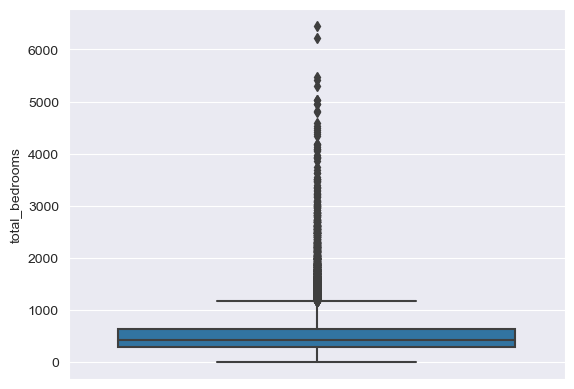

In [18]:
sns.boxplot(y=df['total_bedrooms'])
plt.show()

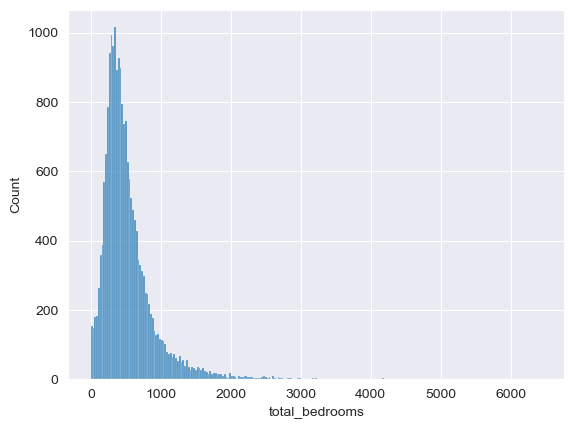

In [19]:
sns.histplot(x=df['total_bedrooms'])
plt.show()

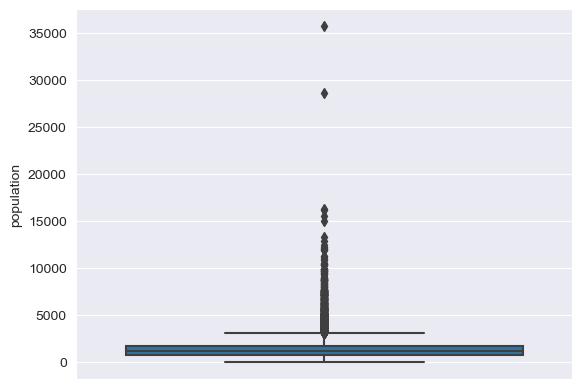

In [20]:
sns.boxplot(y=df['population'])
plt.show()

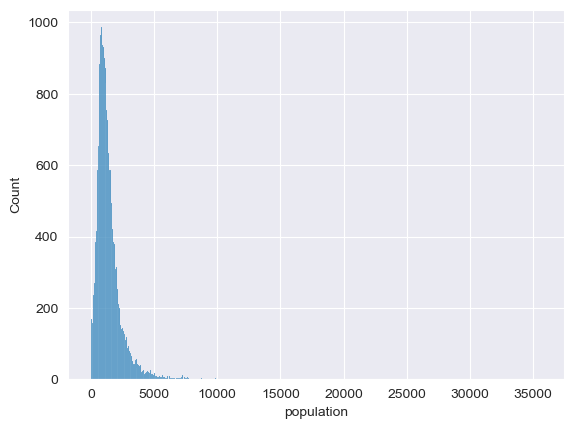

In [21]:
sns.histplot(x=df['population'])
plt.show()

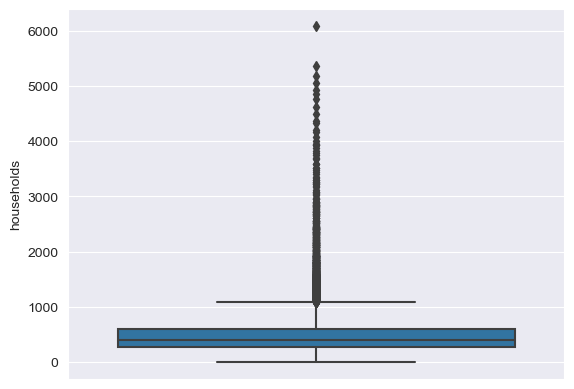

In [22]:
sns.boxplot(y=df['households'])
plt.show()

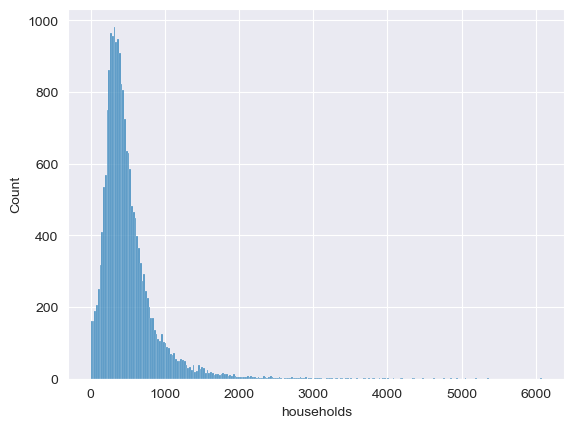

In [23]:
sns.histplot(x=df['households'])
plt.show()

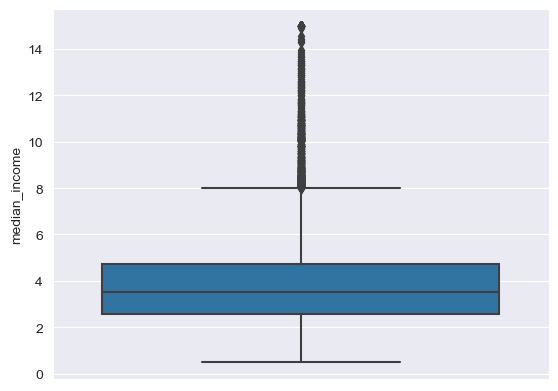

In [24]:
sns.boxplot(y=df['median_income'])
plt.show()

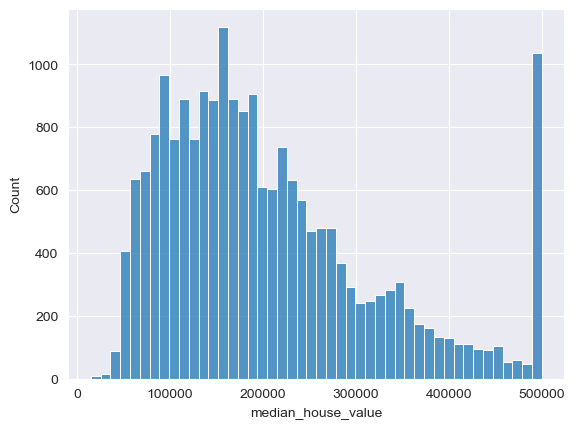

In [25]:
sns.histplot(x=df['median_house_value'])
plt.show()

It's important to emphasize fact that many median values is 500_000.
------------
Even if total_bedrooms will be drop-outed, I try to fill NaNs for training.
I have multivariate data so IterativeImputer should be good choice.

In [60]:
df_after_filling_nan = IterativeImputer().fit_transform(df)

In [64]:
df_after_filling_nan = np.delete(df_after_filling_nan, np.where(df_after_filling_nan[:, 4] > 2000), axis=0)

In [74]:
bins = np.linspace(0, 2000, 20)

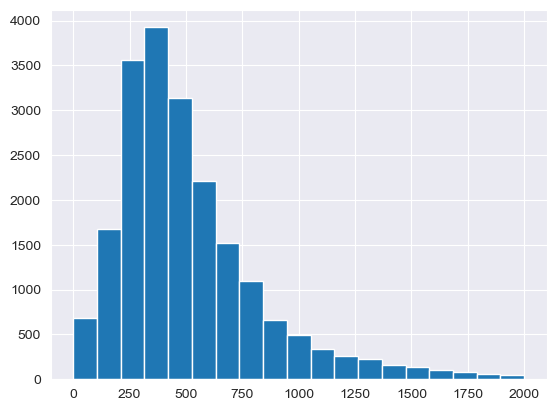

In [75]:
plt.hist(df_after_filling_nan[:,4], bins)
plt.show()

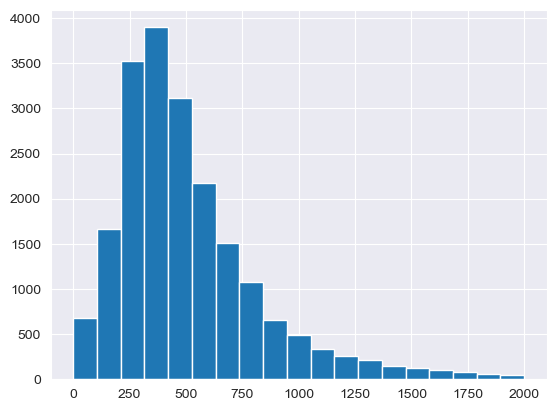

In [76]:
plt.hist(df[(df['total_bedrooms'] < 2000)]['total_bedrooms'], bins)
plt.show()

Don't see any big changes in distribution.